<a href="https://colab.research.google.com/github/juliann24/MLBrandolin/blob/main/ML_Ej3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **El ritmo de la música**
Este *dataset* está compuesto por canciones de 2017 con atributos de la API de Spotify. Cada canción ha sido etiquetada por alguien que usó "1", cuando le gusta la canción o "0" si no le gusta. 

Su tarea es construir un clasificador que pueda predecir las preferencias de los atributos de la canción.

Cada fila del *dataframe* representa una canción. Hay 16 columnas, 13 de las cuales son atributos de la canción, una columna para el nombre de la canción, una para el artista y una columna llamada "destino", que es la etiqueta mencionada anteriormente para la canción. Los atributos de la pista son: acústica, bailabilidad, duración, energía, instrumentalidad, clave, vivacidad, volumen, modo, habla, tempo, marca de tiempo, valencia (más información[aquí](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)).

In [ ]:
import pandas as pd
#leemos el dataset
attributes_spotify_original = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify = attributes_spotify_original.copy()
attributes_spotify.describe()
attributes_spotify

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [ ]:
def calc_affinity_relevance(group):
  group['artist_affinity'] = group['target'].sum()/(group['target'].count())
  group['artist_relevance'] = group['target'].count()/attributes_spotify['target'].count()
  return group
attributes_spotify['artist_affinity'] = ''
attributes_spotify['artist_relevance'] = ''
attributes_spotify=attributes_spotify.groupby(['artist']).apply(calc_affinity_relevance)

In [ ]:
attributes_spotify['is_remix'] = (attributes_spotify['song_title'].apply(str.lower).str.contains('remix|mix|edit',regex=True)).apply(float)
attributes_spotify['is_live'] = (attributes_spotify['song_title'].apply(str.lower).str.contains('live|vivo',regex=True)).apply(float)
attributes_spotify['is_ft'] = (attributes_spotify['song_title'].apply(str.lower).str.contains('ft.|feat.|featuring',regex=True)).apply(float)

In [ ]:
df = attributes_spotify.copy() 
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('target', axis=1, inplace=True)
df.drop('song_title', axis=1, inplace=True)
df.drop('artist', axis=1, inplace=True)

In [ ]:
for dato in df:
  dfmax = df[dato].max()
  dfmin = df[dato].min()
  df[dato] = (df[dato]-dfmin)/(dfmax-dfmin)
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_affinity,artist_relevance,is_remix,is_live,is_ft
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.188530,0.575895,0.232923,0.678170,0.136563,0.485690,0.181061,0.793272,0.612295,0.087734,0.430066,0.742067,0.482673,0.505702,0.104974,0.084779,0.007933,0.067923
std,0.261296,0.186809,0.082928,0.213866,0.279879,0.331658,0.163600,0.114720,0.487347,0.113421,0.155627,0.063963,0.258249,0.489149,0.173618,0.278622,0.088733,0.251676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009676,0.454756,0.186097,0.557567,0.000000,0.181818,0.077352,0.753370,0.000000,0.018161,0.305181,0.750000,0.271835,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.063615,0.590487,0.215681,0.712164,0.000078,0.545455,0.113871,0.818817,1.000000,0.040106,0.429038,0.750000,0.477643,0.600000,0.066667,0.000000,0.000000,0.000000
75%,0.266330,0.714617,0.257227,0.845403,0.055328,0.818182,0.240160,0.864623,1.000000,0.107075,0.524809,0.750000,0.685541,1.000000,0.133333,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
attributes_spotify.sort_values(by=['artist_relevance', 'artist_affinity'], ascending=False).head(20)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,time_signature,valence,target,song_title,artist,artist_affinity,artist_relevance,is_remix,is_live,is_ft
5,5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,...,4.0,0.264,1,Sneakin’,Drake,0.812500,0.007933,0.0,0.0,0.0
6,6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,...,4.0,0.308,1,Childs Play,Drake,0.812500,0.007933,0.0,0.0,0.0
37,37,0.056500,0.853,205879,0.547,0.000000,1,0.3410,-7.535,1,...,4.0,0.677,1,Jumpman,Drake,0.812500,0.007933,0.0,0.0,0.0
117,117,0.002570,0.896,267024,0.623,0.000258,2,0.0390,-8.008,1,...,4.0,0.564,1,Hotline Bling,Drake,0.812500,0.007933,0.0,0.0,0.0
154,154,0.001570,0.790,217707,0.676,0.000000,8,0.2500,-6.432,0,...,4.0,0.314,1,Big Rings,Drake,0.812500,0.007933,0.0,0.0,0.0
158,158,0.190000,0.735,275840,0.410,0.000000,11,0.3410,-8.735,0,...,4.0,0.160,1,Know Yourself,Drake,0.812500,0.007933,0.0,0.0,0.0
168,168,0.047200,0.849,217693,0.408,0.000000,6,0.1010,-8.670,0,...,4.0,0.337,1,Wu-Tang Forever,Drake,0.812500,0.007933,0.0,0.0,0.0
440,440,0.369000,0.662,236733,0.571,0.000197,6,0.0908,-7.382,0,...,4.0,0.442,1,Headlines,Drake,0.812500,0.007933,0.0,0.0,0.0
589,589,0.042500,0.790,173160,0.531,0.000000,8,0.2660,-6.968,1,...,4.0,0.498,1,Started From the Bottom,Drake,0.812500,0.007933,0.0,0.0,0.0
676,676,0.003000,0.766,227027,0.453,0.000035,6,0.0923,-6.651,0,...,4.0,0.346,1,"Hold On, We're Going Home",Drake,0.812500,0.007933,0.0,0.0,0.0


# Entrenamiento del modelo con SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = df # Entradas (tablota)
Y = attributes_spotify.target # Salidas (targets)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, shuffle=True)  # random_state = 0 para congelar el aleatorio
# Creo el modelo y lo entreno
clf = SVC(gamma=0.01)
clf.fit(X_train, Y_train)
# Testeo (pruebo el clasificador con datos de testing)
score = clf.score(X_test, Y_test)
print('Precisión = ', score*100,'%')
print()

Precisión =  98.18281938325991 %



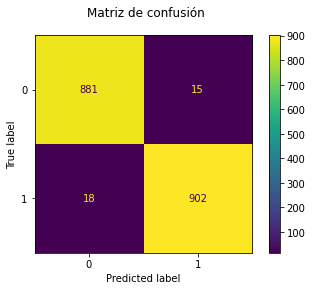

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
Y_pred = clf.predict(X_test)
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
disp.figure_.suptitle('Matriz de confusión')
plt.show()

In [ ]:
attributes_spotify.iloc[X_test.loc[Y_test!=Y_pred].index]

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,time_signature,valence,target,song_title,artist,artist_affinity,artist_relevance,is_remix,is_live,is_ft
131,131,0.022400,0.634,221960,0.609,0.000000,6,0.0990,-8.982,1,...,4.0,0.6590,1,Kush,Lil Wayne,0.500000,0.000992,0.0,0.0,0.0
198,198,0.001920,0.558,301573,0.740,0.000009,6,0.1290,-6.220,1,...,4.0,0.2140,1,All These Things That I've Done,The Killers,0.500000,0.000992,0.0,0.0,0.0
1223,1223,0.043100,0.697,277387,0.527,0.000013,0,0.0882,-10.438,0,...,4.0,0.2890,0,Take Care,Drake,0.812500,0.007933,0.0,0.0,0.0
1187,1187,0.065600,0.828,299333,0.433,0.000876,0,0.1220,-9.716,1,...,4.0,0.4460,0,Lollipop,Lil Wayne,0.500000,0.000992,0.0,0.0,0.0
740,740,0.949000,0.619,240707,0.324,0.000054,9,0.1140,-10.146,0,...,4.0,0.0968,1,Stay,Rihanna,0.333333,0.001487,0.0,0.0,0.0
1218,1218,0.219000,0.427,257760,0.861,0.000000,1,0.2770,-4.874,1,...,4.0,0.5810,0,Best I Ever Had,Drake,0.812500,0.007933,0.0,0.0,0.0
630,630,0.244000,0.624,205973,0.752,0.000000,4,0.1310,-5.430,1,...,4.0,0.8620,1,Young & Gettin' It - feat. Kirko Bangz,Meek Mill,0.333333,0.002975,0.0,0.0,1.0
1477,1477,0.053300,0.599,288877,0.667,0.000000,7,0.1340,-4.267,1,...,4.0,0.8110,0,I'm the One,DJ Khaled,0.750000,0.001983,0.0,0.0,0.0
1167,1167,0.030300,0.415,251423,0.369,0.000008,8,0.3830,-10.044,1,...,4.0,0.0951,0,Selfish,Future,0.750000,0.003966,0.0,0.0,0.0
1676,1676,0.004360,0.578,233182,0.909,0.001280,7,0.7070,-3.672,1,...,4.0,0.5180,0,Mind Tricks,Bassnectar,0.666667,0.001487,0.0,0.0,0.0


# Entrenamiento con knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9,shuffle=True)  # random_state = 0 para congelar el aleatorio
knn = KNeighborsClassifier(n_neighbors=100) # Como parámetro recibe la cantidad de vecinos a evaluar

# Entrenamiento
knn.fit(X_train, Y_train)

# Score/accuracy = cantidad de casos de prueba correctamente clasificados / cantidad de casos de prueba
score = knn.score(X_test, Y_test)
print('El score es ', score)
print()

El score es  0.9823788546255506



 Exactitud del testeo:  0.9823788546255506



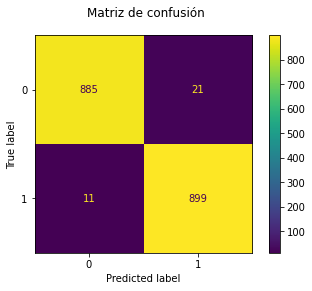

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = knn.predict(X_test)
print(' Exactitud del testeo: ', accuracy_score(Y_test, Y_pred))
print()

# Matriz de confusión
from sklearn import metrics
import matplotlib.pyplot as plt
Y_pred = knn.predict(X_test)
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
disp.figure_.suptitle('Matriz de confusión')
plt.show()